# Urban Sounds Classification using Deep Learning

## Udacity-MLND

In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
#Getting the csv as dataframe using pandas
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [4]:
#displaying the structure of the CSV
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
#Displaying number of data for each fold
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

### Data Visualisation

In [6]:
#importing Audio Visualisation Libraries
from librosa import display
import librosa

In [7]:
#Trying Audio Visualisations using MFCC, MelSpectrogram, Chroma_stft, Chroma_cq, Chroma_cens from librosa
#Feature Set children_playing
y,sr=librosa.load("UrbanSound8K/audio/fold5/100263-2-0-126.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40, 173), (40, 173), (40, 173), (40, 173), (40, 173))

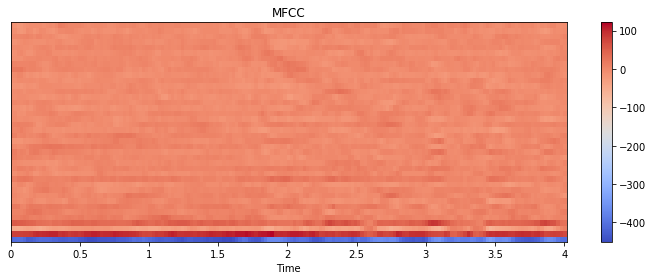

In [8]:
#MFCC
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

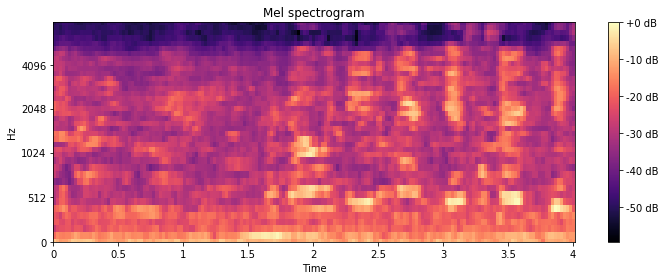

In [9]:
#MelSpectogram
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

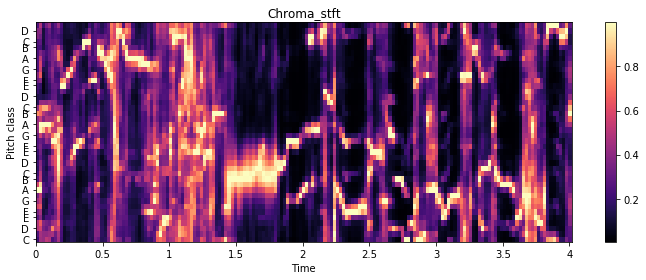

In [10]:
#chroma_stft
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma_stft')
plt.tight_layout()

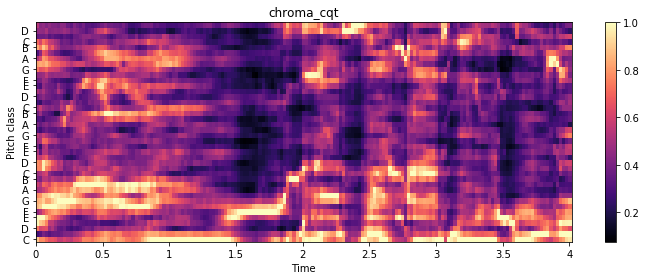

In [11]:
#chroma_cqt
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

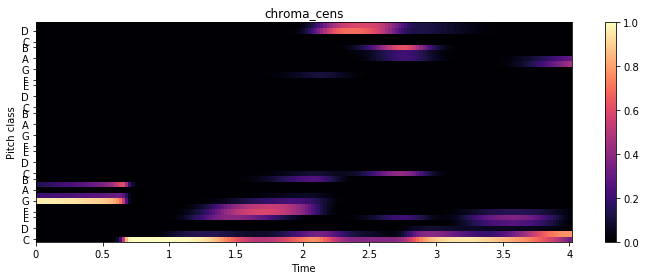

In [13]:
#chroma_cens
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [14]:
#feature set Dog Bark
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40, 14), (40, 14), (40, 14), (40, 14), (40, 14))

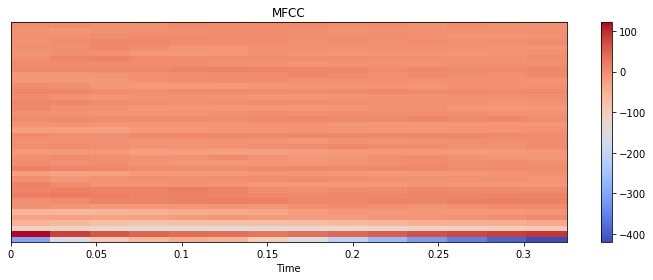

In [15]:
#MFCC
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

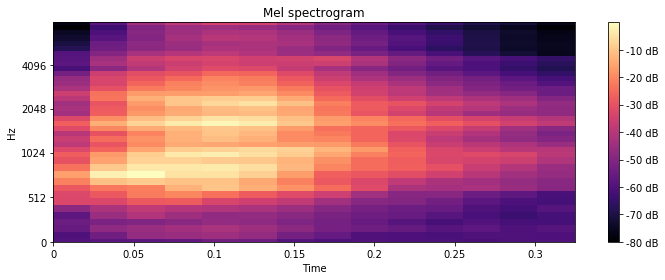

In [16]:
#MelSpectogram
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

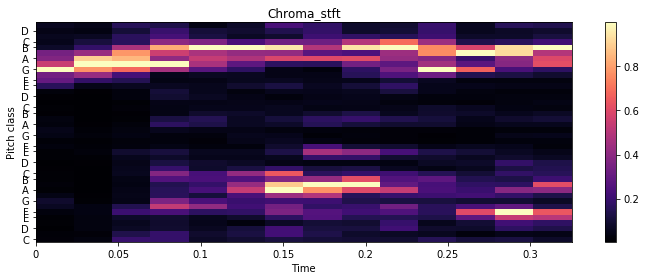

In [17]:
#chroma_stft
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma_stft')
plt.tight_layout()

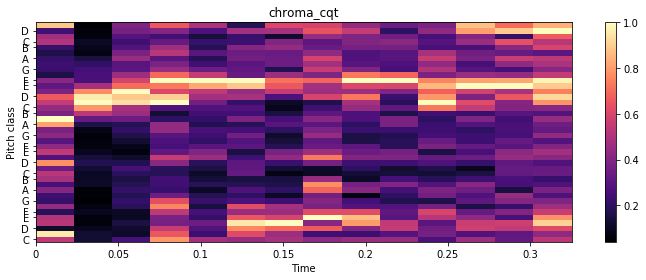

In [18]:
#chroma_cqt
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

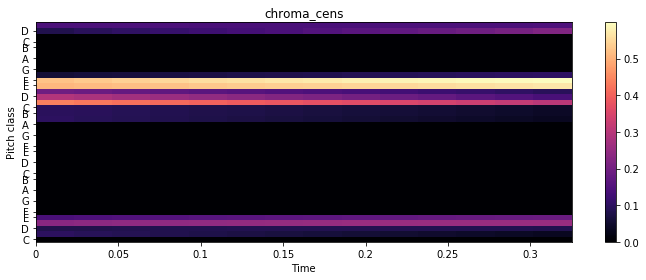

In [19]:
#chroma_cens
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [20]:
#preprocessing using only mfcc
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)

100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [27:28<00:00,  7.03it/s]


In [21]:
len(x_train)

7895

In [22]:
#verifying the count of audios in fold 10 are getting in testset 
len(x_test)

837

In [23]:
#verifying if all the audios are being processed by checking if count matches
len(x_train)+len(x_test)

8732

In [24]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40), (837, 40), (7895,), (837,))

In [27]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]))
x_train_2d.shape,x_test_2d.shape

((7895, 40), (837, 40))

In [ ]:
#saving the data numpy arrays so that we can use multiple times
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [99]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [100]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [101]:
from keras import Sequential
from keras.layers import Dense,Dropout,Activation

In [102]:
#forming model
model=Sequential()
#building the model
model.add(Dense(units=256,activation='relu',input_dim=40))
model.add(Dropout(0.4))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10,activation='softmax'))

In [103]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [104]:
#fitting
model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),batch_size=50)
# Display model architecture summary 


Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - ETA: 1:35 - loss: 12.4586 - acc: 0.12 - ETA: 8s - loss: 12.5729 - acc: 0.1145 - ETA: 5s - loss: 12.2915 - acc: 0.12 - ETA: 3s - loss: 12.0841 - acc: 0.13 - ETA: 2s - loss: 11.9379 - acc: 0.13 - ETA: 2s - loss: 11.8299 - acc: 0.13 - ETA: 1s - loss: 11.5441 - acc: 0.13 - ETA: 1s - loss: 11.2628 - acc: 0.14 - ETA: 1s - loss: 10.9274 - acc: 0.15 - ETA: 1s - loss: 10.6040 - acc: 0.15 - ETA: 0s - loss: 10.2790 - acc: 0.15 - ETA: 0s - loss: 9.8720 - acc: 0.1602 - ETA: 0s - loss: 9.4777 - acc: 0.162 - ETA: 0s - loss: 9.0841 - acc: 0.166 - ETA: 0s - loss: 8.6658 - acc: 0.167 - ETA: 0s - loss: 8.2755 - acc: 0.166 - ETA: 0s - loss: 7.9107 - acc: 0.167 - ETA: 0s - loss: 7.5742 - acc: 0.169 - 2s 206us/step - loss: 7.5162 - acc: 0.1693 - val_loss: 2.1757 - val_acc: 0.2139
Epoch 2/30
7895/7895 [==============================] - ETA: 1s - loss: 2.7235 - acc: 0.220 - ETA: 0s - loss: 2.5907 - acc: 0.21

7895/7895 [==============================] - ETA: 0s - loss: 1.3271 - acc: 0.600 - ETA: 0s - loss: 1.1090 - acc: 0.635 - ETA: 0s - loss: 1.1071 - acc: 0.630 - ETA: 0s - loss: 1.1255 - acc: 0.625 - ETA: 0s - loss: 1.1300 - acc: 0.621 - ETA: 0s - loss: 1.1363 - acc: 0.624 - ETA: 0s - loss: 1.1477 - acc: 0.619 - ETA: 0s - loss: 1.1490 - acc: 0.614 - ETA: 0s - loss: 1.1381 - acc: 0.618 - ETA: 0s - loss: 1.1357 - acc: 0.617 - ETA: 0s - loss: 1.1252 - acc: 0.621 - ETA: 0s - loss: 1.1215 - acc: 0.621 - ETA: 0s - loss: 1.1307 - acc: 0.617 - ETA: 0s - loss: 1.1290 - acc: 0.617 - ETA: 0s - loss: 1.1294 - acc: 0.617 - ETA: 0s - loss: 1.1287 - acc: 0.616 - ETA: 0s - loss: 1.1287 - acc: 0.618 - ETA: 0s - loss: 1.1326 - acc: 0.615 - ETA: 0s - loss: 1.1317 - acc: 0.614 - 1s 126us/step - loss: 1.1302 - acc: 0.6155 - val_loss: 1.3693 - val_acc: 0.5579
Epoch 11/30
7895/7895 [==============================] - ETA: 1s - loss: 1.1670 - acc: 0.600 - ETA: 0s - loss: 1.1599 - acc: 0.608 - ETA: 0s - loss: 1.11

7895/7895 [==============================] - ETA: 1s - loss: 0.7188 - acc: 0.740 - ETA: 1s - loss: 0.7287 - acc: 0.751 - ETA: 0s - loss: 0.7351 - acc: 0.756 - ETA: 0s - loss: 0.7589 - acc: 0.754 - ETA: 0s - loss: 0.7702 - acc: 0.752 - ETA: 0s - loss: 0.7710 - acc: 0.747 - ETA: 0s - loss: 0.7769 - acc: 0.742 - ETA: 0s - loss: 0.7876 - acc: 0.739 - ETA: 0s - loss: 0.7757 - acc: 0.742 - ETA: 0s - loss: 0.7768 - acc: 0.740 - ETA: 0s - loss: 0.7754 - acc: 0.743 - ETA: 0s - loss: 0.7735 - acc: 0.743 - ETA: 0s - loss: 0.7780 - acc: 0.742 - ETA: 0s - loss: 0.7819 - acc: 0.740 - ETA: 0s - loss: 0.7741 - acc: 0.742 - ETA: 0s - loss: 0.7706 - acc: 0.742 - ETA: 0s - loss: 0.7706 - acc: 0.742 - ETA: 0s - loss: 0.7688 - acc: 0.743 - ETA: 0s - loss: 0.7670 - acc: 0.742 - ETA: 0s - loss: 0.7673 - acc: 0.742 - 1s 135us/step - loss: 0.7676 - acc: 0.7425 - val_loss: 1.3857 - val_acc: 0.5950
Epoch 20/30
7895/7895 [==============================] - ETA: 1s - loss: 0.7725 - acc: 0.780 - ETA: 0s - loss: 0.75

7895/7895 [==============================] - ETA: 0s - loss: 0.6076 - acc: 0.780 - ETA: 0s - loss: 0.5935 - acc: 0.788 - ETA: 0s - loss: 0.6111 - acc: 0.790 - ETA: 0s - loss: 0.6100 - acc: 0.788 - ETA: 0s - loss: 0.5966 - acc: 0.795 - ETA: 0s - loss: 0.5947 - acc: 0.792 - ETA: 0s - loss: 0.6003 - acc: 0.792 - ETA: 0s - loss: 0.5896 - acc: 0.797 - ETA: 0s - loss: 0.5933 - acc: 0.795 - ETA: 0s - loss: 0.6066 - acc: 0.793 - ETA: 0s - loss: 0.6099 - acc: 0.793 - ETA: 0s - loss: 0.6019 - acc: 0.797 - ETA: 0s - loss: 0.5987 - acc: 0.799 - ETA: 0s - loss: 0.5932 - acc: 0.800 - ETA: 0s - loss: 0.5943 - acc: 0.800 - ETA: 0s - loss: 0.5961 - acc: 0.798 - 1s 108us/step - loss: 0.5993 - acc: 0.7977 - val_loss: 1.3137 - val_acc: 0.6165
Epoch 29/30
7895/7895 [==============================] - ETA: 2s - loss: 0.4386 - acc: 0.840 - ETA: 1s - loss: 0.4676 - acc: 0.840 - ETA: 1s - loss: 0.5242 - acc: 0.821 - ETA: 1s - loss: 0.5306 - acc: 0.814 - ETA: 0s - loss: 0.5464 - acc: 0.808 - ETA: 0s - loss: 0.55

In [105]:
model.summary()

# Calculate pre-training accuracy 
score_train = model.evaluate(x_train, y_train, verbose=1)
score_test = model.evaluate(x_test, y_test, verbose=1)
accuracy_train = 100*score_train[1]
accuracy_test = 100*score_test[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               10496     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total para

In [97]:
print("Training accuracy: %.4f%%" % accuracy_train)
print("Test accuracy: %.4f%%" % accuracy_test)

Training accuracy: 89.7150%
Test accuracy: 56.9892%
